<a href="https://colab.research.google.com/github/YannisZang/cs-5805-Machine-Learning/blob/main/RANSAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

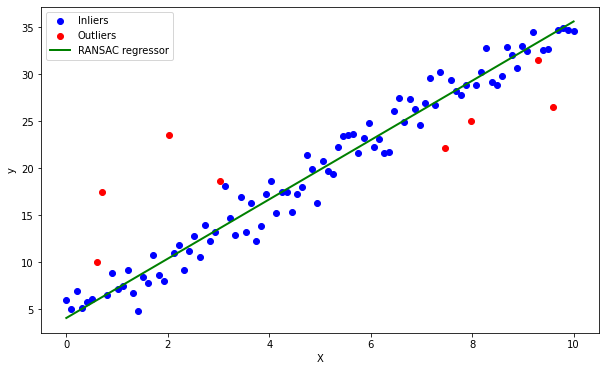

In [ ]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + 5 + np.random.randn(100) * 2

# Introduce some outliers
n_outliers = 10
indices = np.random.choice(np.arange(100), size=n_outliers, replace=False)
y[indices] += 20 * (np.random.rand(n_outliers) - 0.5)

# Create and fit the RANSAC regressor
ransac = RANSACRegressor(estimator=LinearRegression(),
                         residual_threshold=5.0,
                         random_state=42)
ransac.fit(X, y)

# Predict values for plotting
line_X = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

# Identify inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', label='Outliers')
plt.plot(line_X, line_y_ransac, color='green', linewidth=2, label='RANSAC regressor')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()